In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dp_x = pd.read_csv('data/proton/World_ep_CrossSections.dat', sep='\s+')
#dp_x.head()

In [3]:
dp_pol = pd.read_csv('data/proton/World_GEpGMp_Polarization.dat', sep='\s+', skiprows=1, header=None)
# loop over the rows and print them
#for i in range(0, len(dp_pol)):
#    print(dp_pol.iloc[i])

dp_pol[13]=dp_pol[5]+dp_pol[6]+dp_pol[7]+dp_pol[8]+dp_pol[9]+dp_pol[10]+dp_pol[11]+dp_pol[12]
#delete columns
dp_pol = dp_pol.drop([5,6,7,8,9,10,11,12], axis=1)
#rename columns
dp_pol.columns = ['Q^2', 'Rp', 'Rp_stat', 'Rp_sys','idat','Source']
#dp_pol.info()


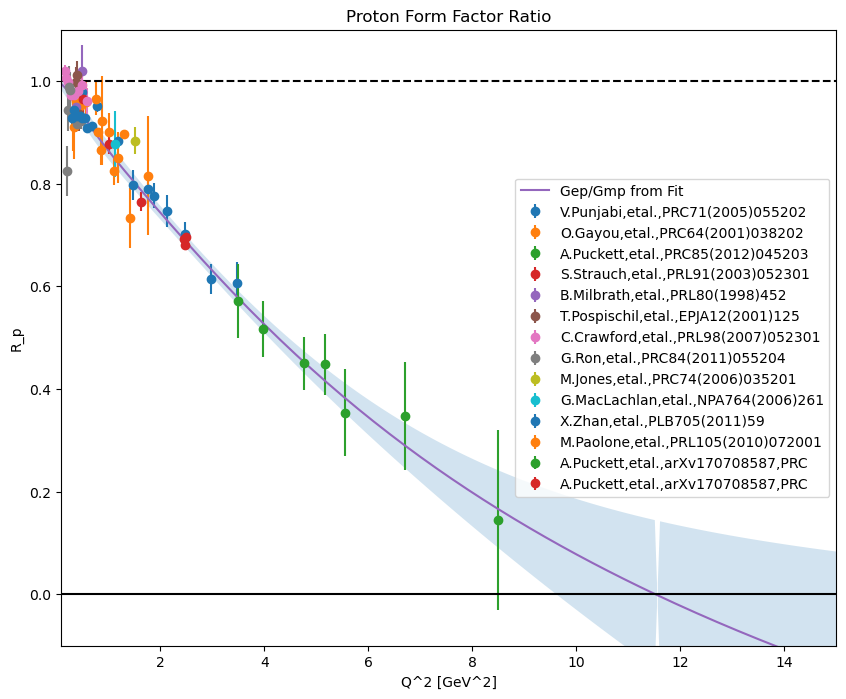

In [4]:
# create list of datasets with the same idat value
dp_pol_list = []
for i in dp_pol['idat'].unique():
    dp_pol_list.append(dp_pol[dp_pol['idat']==i])
    
# Plot the data
fig, ax = plt.subplots(figsize=(10,8))
for i in dp_pol_list:
    ax.errorbar(i['Q^2'], i['Rp'], yerr=i['Rp_stat'], fmt='o', label=i['Source'].values[0])
    #print(i['Source'].values[0])
ax.set_xlabel('Q^2 [GeV^2]')
ax.set_ylabel('R_p')
ax.set_title('Proton Form Factor Ratio')

from GetFF import GetFF
q2val = np.linspace(0.01, 100, 1001)
gepval = []
dgepval = []
gmpval = []
dgmpval = []
rp = []
drp = []

for q2 in q2val:
    gep, dgep = GetFF(1,q2)
    gmp, dgmp = GetFF(2,q2)
    gepval.append(gep)
    dgepval.append(dgep)
    gmpval.append(gmp)
    dgmpval.append(dgmp)
    rp.append(gep/gmp)
    drp.append(gep/gmp*np.sqrt((dgep/gep)**2+(dgmp/gmp)**2))
   
rp_upper = np.array(rp)+np.array(drp)
rp_lower = np.array(rp)-np.array(drp)
ax.plot(q2val, rp, label='Gep/Gmp from Fit')
ax.fill_between(q2val, rp_upper, rp_lower, alpha=0.2)

# horizontal line at 1
ax.axhline(y=1, color='k', linestyle='--')
# horizontal line at 0
ax.axhline(y=0, color='k', linestyle='-')

ax.set_xlim(0.1,15)
ax.set_ylim(-0.1,1.1)
ax.legend()

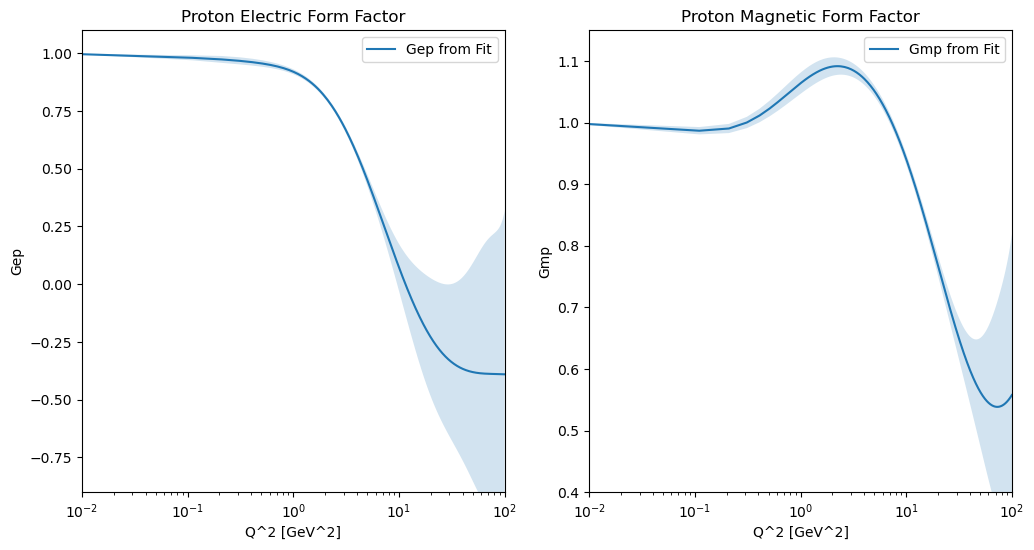

In [5]:
# Plot Gep and Gmp separately

fig, ax = plt.subplots(1, 2, figsize=(12,6))
# plot Gep vs Q^2
gep_upper = np.array(gepval)+np.array(dgepval)
gep_lower = np.array(gepval)-np.array(dgepval)
ax[0].plot(q2val, gepval, label='Gep from Fit')
ax[0].fill_between(q2val, gep_upper, gep_lower, alpha=0.2)
# plot Gmp vs Q^2
gmp_upper = np.array(gmpval)+np.array(dgmpval)
gmp_lower = np.array(gmpval)-np.array(dgmpval)
ax[1].plot(q2val, gmpval, label='Gmp from Fit')
ax[1].fill_between(q2val, gmp_upper, gmp_lower, alpha=0.2)

ax[0].set_xlabel('Q^2 [GeV^2]')
ax[0].set_ylabel('Gep')
ax[0].set_title('Proton Electric Form Factor')
ax[0].set_xscale('log')
ax[0].set_ylim(-0.9, 1.1)
ax[0].set_xlim(0.01, 100)

ax[1].set_xlabel('Q^2 [GeV^2]')
ax[1].set_ylabel('Gmp')
ax[1].set_title('Proton Magnetic Form Factor')
ax[1].set_xscale('log')
ax[1].set_ylim(0.4, 1.15)
ax[1].set_xlim(0.01, 100)

ax[0].legend()
ax[1].legend()

plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Q2       38 non-null     float64
 1   GEn/GD   38 non-null     float64
 2   dGEn/GD  38 non-null     float64
 3   ExpType  38 non-null     float64
 4   ExpNum   38 non-null     int64  
 5   Norm     38 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Q2            33 non-null     float64
 1   GMn/mu_n/GD   33 non-null     float64
 2   dGMn/mu_n/GD  33 non-null     float64
 3   ExpType       33 non-null     float64
 4   ExpNum        33 non-null     int64  
 5   Norm          33 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.7 KB


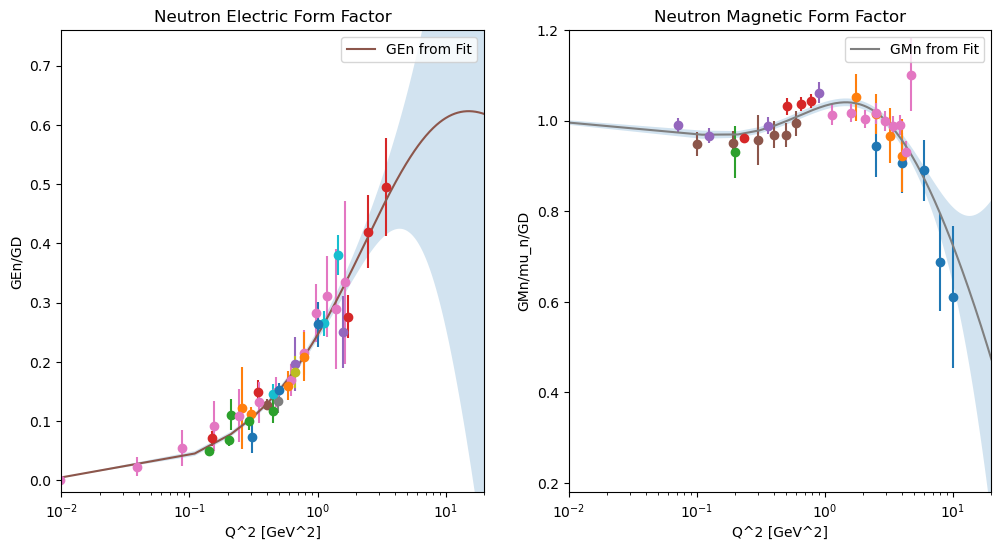

In [6]:
# GEn and GMn

dgen = pd.read_csv('data/neutron/World_GEn.dat', sep='\s+',)
dgen.info()
# Add dipole form factor column
dgen['GD'] = 1/(1+dgen['Q2']/0.71)**2

dgmn = pd.read_csv('data/neutron/World_GMn.dat', sep='\s+',)
dgmn.info()
# Add dipole form factor column
dgmn['GD'] = 1/(1+dgmn['Q2']/0.71)**2

# Separate the datasets

dgen_list = []
for i in dgen['ExpNum'].unique():
    dgen_list.append(dgen[dgen['ExpNum']==i])

dgmn_list = []
for i in dgmn['ExpNum'].unique():
    dgmn_list.append(dgmn[dgmn['ExpNum']==i])
    
# Plot the data
fig, ax = plt.subplots(1, 2, figsize=(12,6))
for i in dgen_list:
    ax[0].errorbar(i['Q2'], i['GEn/GD']/i['GD'], yerr=i['dGEn/GD']/i['GD'],fmt='o')
    
for i in dgmn_list:
    ax[1].errorbar(i['Q2'], i['GMn/mu_n/GD'], yerr=i['dGMn/mu_n/GD'], fmt='o')

# Calculate the fits
genval = []
dgenval = []
gmnval = []
dgmnval = []
for q2 in q2val:
    gen, dgen = GetFF(3,q2)
    gmn, dgmn = GetFF(4,q2)
    genval.append(gen)
    dgenval.append(dgen)
    gmnval.append(gmn)
    dgmnval.append(dgmn)
    
# Plot the fits
gen_upper = np.array(genval)+np.array(dgenval)
gen_lower = np.array(genval)-np.array(dgenval)
ax[0].plot(q2val, genval, label='GEn from Fit')
ax[0].fill_between(q2val, gen_upper, gen_lower, alpha=0.2)

gmn_upper = np.array(gmnval)+np.array(dgmnval)
gmn_lower = np.array(gmnval)-np.array(dgmnval)
ax[1].plot(q2val, gmnval, label='GMn from Fit')
ax[1].fill_between(q2val, gmn_upper, gmn_lower, alpha=0.2)
    
# Make x axis logarithmic
ax[0].set_xscale('log')
ax[1].set_xscale('log')

# Set limits
ax[0].set_xlim(0.01, 20)
ax[1].set_xlim(0.01, 20)
ax[0].set_ylim(-0.02, 0.76)
ax[1].set_ylim(0.18, 1.2)

# Set labels
ax[0].set_xlabel('Q^2 [GeV^2]')
ax[0].set_ylabel('GEn/GD')
ax[0].set_title('Neutron Electric Form Factor')

ax[1].set_xlabel('Q^2 [GeV^2]')
ax[1].set_ylabel('GMn/mu_n/GD')
ax[1].set_title('Neutron Magnetic Form Factor')

ax[0].legend()
ax[1].legend()
plt.show()